In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('Loan_Approval_Prediction_Dataset (1).csv')

In [ ]:
data=pd.read_csv('Loan_Approval_Prediction_Dataset (1).csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Calculate and print percentage of missing values for each feature
for column in data.columns:
    missing_percentage = (data[column].isnull().sum() / data.shape[0]) * 100
    print('Percent of missing "{}" records is {:.2f}%'.format(column, missing_percentage))

Percent of missing "Loan_ID" records is 0.00%
Percent of missing "Gender" records is 2.12%
Percent of missing "Married" records is 0.49%
Percent of missing "Dependents" records is 2.44%
Percent of missing "Education" records is 0.00%
Percent of missing "Self_Employed" records is 5.21%
Percent of missing "ApplicantIncome" records is 0.00%
Percent of missing "CoapplicantIncome" records is 0.00%
Percent of missing "LoanAmount" records is 3.58%
Percent of missing "Loan_Amount_Term" records is 2.28%
Percent of missing "Credit_History" records is 8.14%
Percent of missing "Property_Area" records is 0.00%
Percent of missing "Loan_Status" records is 0.00%


Number of people who take a loan group by gender :
Gender
Male      489
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

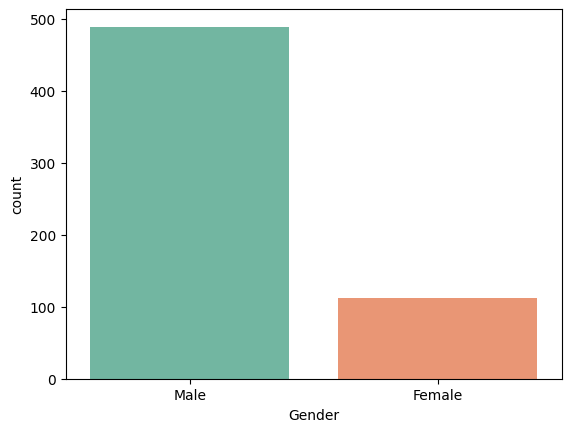

In [ ]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, hue = 'Gender', palette = 'Set2', legend = False)

Number of people who take a loan group by gender :
Married
Yes    398
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

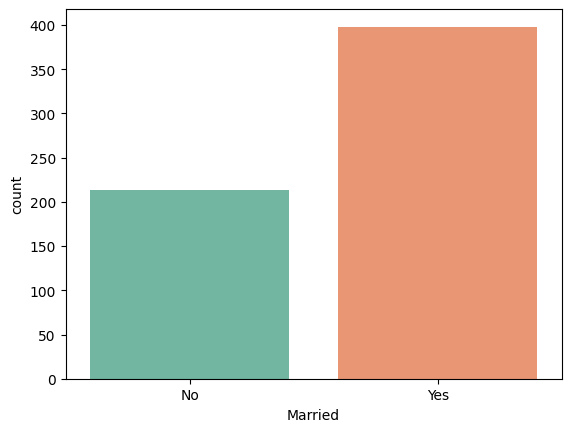

In [ ]:
column = 'Married'
print("Number of people who take a loan group by gender :")
print(data[column].value_counts())
sns.countplot(x=column, data=data, hue = column, palette = 'Set2', legend = False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [ ]:
X = data.drop(['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',   # stable for small datasets
    max_iter=5000,
    random_state=42
)

model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100

print("Model Accuracy:", accuracy)


Model Accuracy: 78.86178861788618
